In [119]:
from pathlib import Path
import pandas as pd
import numpy as np

In [120]:
processed = Path('../data/processed')
selection_data = pd.read_pickle(Path(processed) / 'selection_data.pkl')

In [121]:
selection_data = selection_data[selection_data.year >= 2000]

In [122]:
selection_data[['spot', 'home']].value_counts()

spot  home
1.0   0.0     2053
      1.0     1902
3.0   1.0      914
2.0   1.0      808
      0.0      767
3.0   0.0      606
4.0   1.0      167
      0.0      110
5.0   1.0       21
      0.0       18
6.0   0.0        1
dtype: int64

In [123]:
def adjust_plot(plt):
    plt.xaxis.grid(False)
    plt.yaxis.grid(True, linestyle='dashed', color='lightgrey')
    plt.set_axisbelow(True)
    plt.xaxis.set_ticks_position('none') 
    plt.yaxis.set_ticks_position('none') 

    plt.spines['right'].set_visible(False)
    plt.spines['top'].set_visible(False)

In [124]:
Wins = selection_data.loc[selection_data['Win'] == True, 'Win'].count()
Loses = selection_data.loc[selection_data['Win'] == False, 'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

76.2%


In [125]:
def streak_counter(df):
    df['L_Win'] = df['Win'].shift(1)
    df['L_year'] = df['year'].shift(1)
    df['start_of_streak'] = (df['Win'] != df['L_Win']) | (df['year'] != df['L_year'])
    df['streak_id'] = df['start_of_streak'].cumsum()
    df['streak_counter'] = df.groupby('streak_id').cumcount() + 1
    df.loc[df.Win == 0, 'streak_counter'] = 0
    
    return df

In [126]:
selection_data = selection_data.astype({'Win':'int8'})
selection_data = streak_counter(selection_data)
streaks = selection_data.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

45

In [127]:
year_results = selection_data.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.765363,20
2001.0,0.761111,22
2002.0,0.783333,17
2003.0,0.780556,30
2004.0,0.758333,19
2005.0,0.788618,17
2006.0,0.719444,20
2007.0,0.790055,45
2008.0,0.765840,11


In [128]:
selection_data['EstProb'].describe()

count    7367.000000
mean        0.749586
std         0.014214
min         0.680355
25%         0.739937
50%         0.748332
75%         0.758351
max         0.803427
Name: EstProb, dtype: float64

<AxesSubplot:xlabel='EstProb', ylabel='Win'>

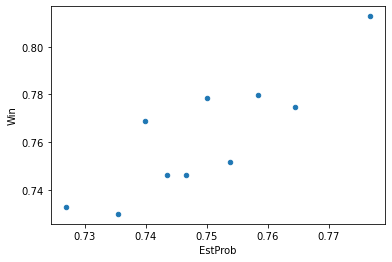

In [129]:
selection_data['bin'] = pd.qcut(selection_data['EstProb'], 10, duplicates='drop')

dots = selection_data.groupby(['bin'])[['EstProb', 'Win']].agg('mean')
dots = dots.reset_index()
dots.plot.scatter('EstProb','Win')

In [130]:
# Relief pitchers data

# Reduce noise by using rolling windows to calculate moving averages over seasons for park records, batting records, and pitching records.
# Improve to weighted averages

# Start including data from current season

# Relief pitchers data

# Game Scores/ELOs

# Team ratings

# Better Pitcher overall ratings

# Merge in 538 ELO ratings


# Set up S3 if necessary for size, or for GPUs

# Check # training observations for each model fit 
# and make sure we aren't losing any

# Ensemble methods for NN and logistic

# Rest days

# Adjust Pitcher and Batter stats for park record ( merge it in and divide) - compare adjusted at home and away stats

# New pitcher flag?

# Find out where they are in the rotation

# Fix training so that it doesn't need to specify number of variables

# Split up grid search vs. non-grid search training

# optimal skip strategy

# Why is Win missing? Check merge loss

# Time-series CV

# Come up with potential guesses remaining counter (get schedule?)

# Clean up program to select paramaters from sgd and feed them into NN

# add random state var to imputer and anything else random for repeatability

# Predict closer from roster and then use their rgs to construct estimated closing rgs (or just rgs for closing team)

# why is g d boost AUC ROC so low? check on test set

In [131]:
restricted = selection_data.loc[
    (selection_data['park_factor'] >= 1) &
    (selection_data['spot'] <= 4),
    ['Win', 'year']
]

In [132]:
restricted= restricted.astype({'Win':'int8'})
restricted = streak_counter(restricted)
streaks = restricted.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

35

In [133]:
Wins = restricted.loc[
    (restricted['Win'] == True),
    'Win'].count()
Loses = restricted.loc[
    (restricted['Win'] == False),
    'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

76.9%


In [134]:
year_results = restricted.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.784722,21
2001.0,0.764957,16
2002.0,0.811159,20
2003.0,0.778986,22
2004.0,0.752688,20
2005.0,0.790123,14
2006.0,0.705085,20
2007.0,0.784512,35
2008.0,0.783582,20


In [116]:
selection_data = selection_data.sort_values(['year', 'Date'])

In [117]:
selection_data['pick_day'] = selection_data.groupby(['year']).cumcount() + 1
selection_data['pick_day'] = np.ceil(selection_data['pick_day'] / 2)

In [118]:
year_results.sort_values(['Win'], ascending=[False])

,Win,streak_counter
year,,
2015.0,0.822034,16
2002.0,0.811159,20
2018.0,0.799308,27
2019.0,0.792453,17
2005.0,0.790123,14
2009.0,0.789091,24
2000.0,0.784722,21
2007.0,0.784512,35
2008.0,0.783582,20
